<a href="https://colab.research.google.com/github/AlameenWazz/SKYTRAX-AIRLINE-REVIEW-ANALYSIS/blob/main/SkyTrax1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I flew to LHR from ATH in C...
1,✅ Trip Verified | I like the British Airways ...
2,✅ Trip Verified | I have come to boarding and...
3,✅ Trip Verified | Stinking nappies being chang...
4,✅ Trip Verified | Worst service ever. Lost bag...


In [ ]:
import os

# Specify the directory path
directory_path = "data"

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Now you can save your DataFrame to the CSV file within the 'data' directory
df.to_csv(os.path.join(directory_path, "BA_reviews.csv"))


In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df.columns

Index(['reviews'], dtype='object')

In [ ]:
#cleaning the review column
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified', '')


# Save the cleaned DataFrame back to the CSV file
df.to_csv(os.path.join(directory_path, "cleaned_BA_reviews.csv"), index=False)

In [ ]:
df.head()

,reviews
0,| I flew to LHR from ATH in Club Europe with...
1,| I like the British Airways World Traveller...
2,| I have come to boarding and my cabin lugga...
3,| Stinking nappies being changed in business ...
4,| Worst service ever. Lost baggage because of...


In [ ]:
print(df.tail(10))

                                               reviews
990   |  Gatwick to Mauritius. My wife and 2 friend...
991  Not Verified |  Flew out of Heathrow on 22nd F...
992   |  Horrible flight BA from Gatwick to Cape To...
993   |  New York to Venice via London. Staff have ...
994   |  Chicago to London Heathrow. Club Class on ...
995   |  London to Chicago. Could it get any worse?...
996   |  Prague to London Heathrow. Very disappoint...
997   |  London City to Florence. My flight was at ...
998   |  London to Johannesburg. Since the aircraft...
999   |  Doha to London Heathrow. Flight on time, n...


In [ ]:
#cleaning the review column
df['reviews'] = df['reviews'].str.replace('Not Verified', '')


# Save the cleaned DataFrame back to the CSV file
df.to_csv(os.path.join(directory_path, "cleaned_BA_reviews.csv"), index=False)

In [ ]:
print(df.tail(10))

                                               reviews
990   |  Gatwick to Mauritius. My wife and 2 friend...
991   |  Flew out of Heathrow on 22nd Feb to New Yo...
992   |  Horrible flight BA from Gatwick to Cape To...
993   |  New York to Venice via London. Staff have ...
994   |  Chicago to London Heathrow. Club Class on ...
995   |  London to Chicago. Could it get any worse?...
996   |  Prague to London Heathrow. Very disappoint...
997   |  London City to Florence. My flight was at ...
998   |  London to Johannesburg. Since the aircraft...
999   |  Doha to London Heathrow. Flight on time, n...


In [ ]:
# Print the entire DataFrame
display(df)

,reviews
0,| I flew to LHR from ATH in Club Europe with...
1,| I like the British Airways World Traveller...
2,| I have come to boarding and my cabin lugga...
3,| Stinking nappies being changed in business ...
4,| Worst service ever. Lost baggage because of...
...,...
995,| London to Chicago. Could it get any worse?...
996,| Prague to London Heathrow. Very disappoint...
997,| London City to Florence. My flight was at ...
998,| London to Johannesburg. Since the aircraft...


In [ ]:
pip install pandas scikit-learn matplotlib wordcloud

In [ ]:
print(type(stop_words))

<class 'frozenset'>


In [ ]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the cleaned data
df = pd.read_csv(os.path.join(directory_path, "cleaned_BA_reviews.csv"))
reviews = df['reviews']

# Tokenize and remove stop words using scikit-learn
vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(reviews)
tokenized_reviews = vectorizer.get_feature_names_out()

# Topic modeling using Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the topics
for index, topic in enumerate(lda.components_):
    print(f"Top words for Topic #{index + 1}:")
    print([tokenized_reviews[i] for i in topic.argsort()[-10:]])
    print('\n')


Top words for Topic #1:
['food', 'cabin', 'service', 'bag', 'business', 'seat', 'british', 'london', 'airways', 'flight']


Top words for Topic #2:
['travel', 'refund', 'flights', 'airline', 'booked', 'london', 'voucher', 'cancelled', 'ba', 'flight']


Top words for Topic #3:
['hours', 'cabin', 'seats', 'staff', 'crew', 'time', 'service', 'london', 'ba', 'flight']


Top words for Topic #4:
['seat', 'business', 'class', 'london', 'customer', 'british', 'airways', 'service', 'ba', 'flight']


Top words for Topic #5:
['club', 'business', 'time', 'crew', 'class', 'food', 'service', 'ba', 'good', 'flight']




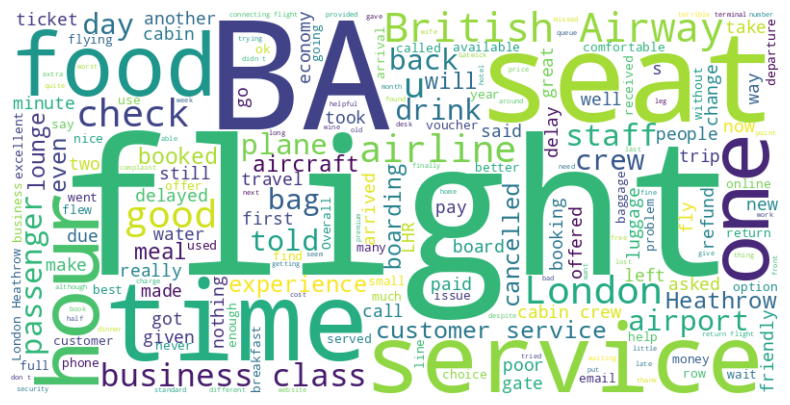

In [ ]:
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv(os.path.join(directory_path, "cleaned_BA_reviews.csv"))
reviews = df['reviews']

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
!pip install nltk

In [ ]:
pip install textblob

In [ ]:
!pip show nltk

Name: nltk
Version: 3.8.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: click, joblib, regex, tqdm
Required-by: textblob


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the cleaned data
df = pd.read_csv(os.path.join(directory_path, "cleaned_BA_reviews.csv"))


# Sentiment Analysis using TextBlob
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda score: 'positive' if score >= 0 else 'negative')

# Display Sentiment Analysis Results
print("Sentiment Analysis Results:")
print(df[['reviews', 'sentiment_label']])


Sentiment Analysis Results:
                                               reviews sentiment_label
0     |  I flew to LHR from ATH in Club Europe with...        positive
1     |  I like the British Airways World Traveller...        positive
2     |  I have come to boarding and my cabin lugga...        positive
3     | Stinking nappies being changed in business ...        positive
4     | Worst service ever. Lost baggage because of...        negative
..                                                 ...             ...
995   |  London to Chicago. Could it get any worse?...        negative
996   |  Prague to London Heathrow. Very disappoint...        negative
997   |  London City to Florence. My flight was at ...        positive
998   |  London to Johannesburg. Since the aircraft...        positive
999   |  Doha to London Heathrow. Flight on time, n...        negative

[1000 rows x 2 columns]


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')  # Download VADER lexicon

# Load the cleaned data
df = pd.read_csv(os.path.join(directory_path, "cleaned_BA_reviews.csv"))

# Sentiment Analysis using VADER
sid = SentimentIntensityAnalyzer()
df['compound'] = df['reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment'] = df['compound'].apply(lambda score: 'positive' if score >= 0 else 'negative')

# Display Sentiment Analysis Results
print("Sentiment Analysis Results:")
print(df[['reviews', 'sentiment']])



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis Results:
                                               reviews sentiment
0     |  I flew to LHR from ATH in Club Europe with...  positive
1     |  I like the British Airways World Traveller...  positive
2     |  I have come to boarding and my cabin lugga...  negative
3     | Stinking nappies being changed in business ...  negative
4     | Worst service ever. Lost baggage because of...  negative
..                                                 ...       ...
995   |  London to Chicago. Could it get any worse?...  negative
996   |  Prague to London Heathrow. Very disappoint...  negative
997   |  London City to Florence. My flight was at ...  positive
998   |  London to Johannesburg. Since the aircraft...  positive
999   |  Doha to London Heathrow. Flight on time, n...  negative

[1000 rows x 2 columns]


In [ ]:
# Get the count of positive and negative sentiments
sentiment_counts = df['sentiment'].value_counts()

# Print the sentiment counts
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
negative    508
positive    492
Name: sentiment, dtype: int64


<ipython-input-59-8624b1b7ebdc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


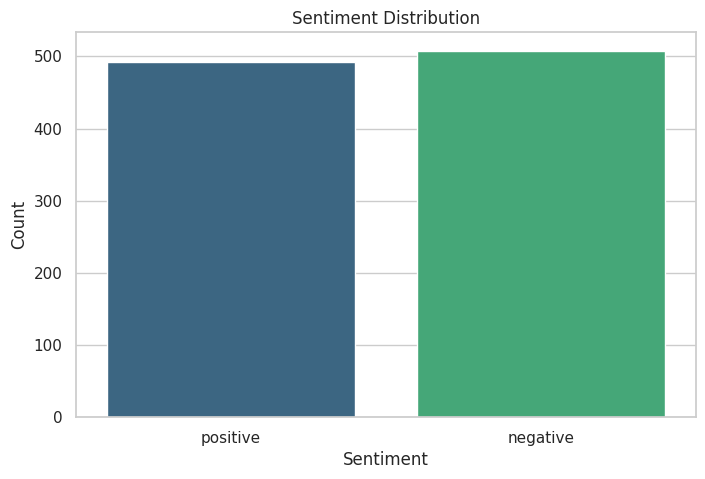

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'df' is the DataFrame with sentiment labels and topics
sns.set(style="whitegrid")

# Bar chart for sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-58-d88792495d8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis', order=['negative', 'neutral', 'positive'])


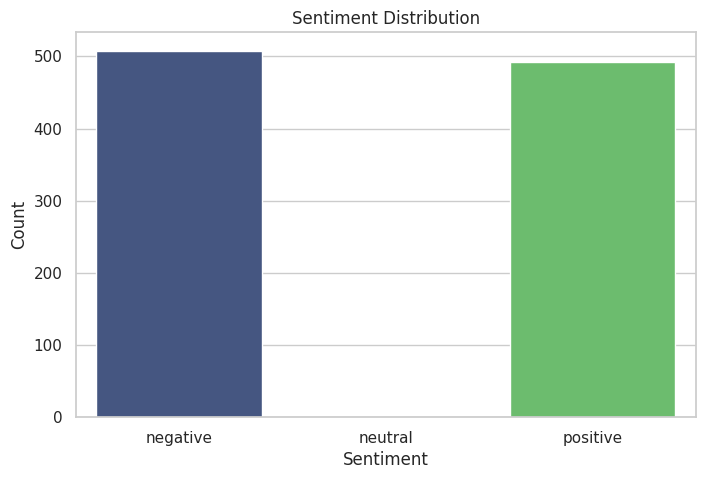

In [ ]:
# Bar chart for sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis', order=['negative', 'neutral', 'positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

